In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

## Preparing and Loading the Data

In [92]:
app = pd.read_csv('average-property-price.csv')

In [93]:
loc_codes = pd.read_csv('location-codes.csv')

In [94]:
display(app)
loc_codes.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


## Separating the Region from Area

In [95]:
region_data = app[app.Code.str[0:3] == 'E12'].copy()
region_data

,Date,Area,Code,Detached,Semi,Terraced,Flat
5436,01/09/2016,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
5437,01/10/2016,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
5438,01/11/2016,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
5439,01/12/2016,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
5440,01/01/2017,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


## Assigning each Area Record the Corresponding Region Code

In [96]:
app2 = app.merge(loc_codes,left_on='Code',right_on='AuthorityCode').copy()
app2 = app2.drop(columns=['AuthorityCode','AuthorityName','RegionName'],axis=1)
app2

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,E12000001
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,E12000001
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,E12000001
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,E12000001
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,E12000001
...,...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,E12000005
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,E12000005
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,E12000005
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,E12000005


Maybe comment on the fact that both dataframes have different lengths and numbers of names 

In [97]:
print(len(app.Area.unique()))

160


In [98]:
print(len(loc_codes.AuthorityName.unique()))

153


In [99]:
# for x in app.Area.unique():
#     if x not in loc_codes.AuthorityName.unique():
#         print(x)

## Checking for missing data
The dataframe has a number of missing values from Detached, Semi and Terraced but only in the Area of City of London. All the values for Detached and Semi are missing so we cannot find a summary statistic for these values. As Terraced does have 16 actual values, I have found the median of these and replaced the null values. 

In [100]:
app2.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced      20
Flat           0
RegionCode     0
dtype: int64

In [101]:
app2[app2.Detached.isnull()].head()

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode
3276,01/09/2016,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,E12000007
3277,01/10/2016,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,E12000007
3278,01/11/2016,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,E12000007
3279,01/12/2016,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,E12000007
3280,01/01/2017,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,E12000007


In [102]:
app2_terrace = app2.groupby('Area')['Terraced'].median()
app2_semi = app2.groupby('Area')['Semi'].median()
app2_detach = app2.groupby('Area')['Detached'].median()
app_medians = pd.concat([app2_terrace,app2_semi,app2_detach],axis=1)
app_medians = app_medians.reset_index()
print('Median value for Terraced in City of London = ' + str(app_medians.Terraced[app_medians.Area == 'City of London'].values))


Median value for Terraced in City of London = [1232198.045]


In [103]:
app2.Terraced = app2.Terraced.fillna(1232198.045)
app2[app2.Area == 'City of London']

,Date,Area,Code,Detached,Semi,Terraced,Flat,RegionCode
3276,01/09/2016,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,E12000007
3277,01/10/2016,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,E12000007
3278,01/11/2016,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,E12000007
3279,01/12/2016,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,E12000007
3280,01/01/2017,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,E12000007
3281,01/02/2017,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,E12000007
3282,01/03/2017,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,E12000007
3283,01/04/2017,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,E12000007
3284,01/05/2017,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,E12000007
3285,01/06/2017,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,E12000007


In [104]:
app2.isnull().sum()

Date           0
Area           0
Code           0
Detached      36
Semi          36
Terraced       0
Flat           0
RegionCode     0
dtype: int64

## Trends

In [105]:
region_data.head()
region_data.Date = pd.to_datetime(region_data.Date,dayfirst=True)
#rd2.index.values

In [106]:
region_data
#display(df)
gby = region_data.groupby(['Area','Date'])['Detached'].sum().reset_index()
display(gby)

,Area,Date,Detached
0,East Midlands,2016-09-01,253192.5738
1,East Midlands,2016-10-01,253113.5644
2,East Midlands,2016-11-01,256399.0387
3,East Midlands,2016-12-01,256072.6841
4,East Midlands,2017-01-01,254846.8515
...,...,...,...
319,Yorkshire and The Humber,2019-04-01,261924.2783
320,Yorkshire and The Humber,2019-05-01,261778.7529
321,Yorkshire and The Humber,2019-06-01,264474.9522
322,Yorkshire and The Humber,2019-07-01,266174.1596


In [107]:
gby_pivot = gby.pivot(index='Date', values='Detached', columns='Area')
gby_pivot

Area,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands Region,Yorkshire and The Humber
Date,,,,,,,,,
2016-09-01,253192.5738,405841.8655,883706.1247,208117.1739,258657.9184,527197.4444,366226.9314,293131.3321,241975.9618
2016-10-01,253113.5644,406573.8362,883336.1414,208519.1158,257093.7678,528135.7832,362947.1527,291204.5534,242695.6641
2016-11-01,256399.0387,408206.6914,886552.8418,210555.4948,259290.4851,531277.2444,368767.4806,295637.5125,245728.3337
2016-12-01,256072.6841,411744.8900,887004.7033,211728.7243,258008.8847,530752.5402,365481.7859,294605.1742,246480.2363
2017-01-01,254846.8515,410560.0190,893279.1773,205942.7099,258860.3637,537855.6757,369559.0554,294141.4508,241975.4125
2017-02-01,256861.6541,411944.6695,887958.7840,209000.7787,260254.7932,529118.8580,368844.6919,294116.9249,242962.8627
2017-03-01,257481.8619,411211.1664,893858.7342,206299.9682,259462.3536,533570.9350,368883.8500,295564.0449,242610.4487
2017-04-01,261248.1976,416558.8181,899132.7916,209870.7827,263377.9298,538673.2864,370826.5935,297490.4605,248126.6759
2017-05-01,260872.7607,417077.1037,890430.0883,211397.5399,262220.8090,534449.8795,370853.6026,297428.8104,247651.9871


In [108]:
print(gby_pivot.columns)

Index(['East Midlands', 'East of England', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands Region',
       'Yorkshire and The Humber'],
      dtype='object', name='Area')


In [109]:
# scaler = StandardScaler()
# gby_pivot[gby_pivot.columns] = scaler.fit_transform(gby_pivot)
# gby_pivot


In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
gby_pivot[gby_pivot.columns] = scaler2.fit_transform(gby_pivot)
gby_pivot

Area,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands Region,Yorkshire and The Humber
Date,,,,,,,,,
2016-09-01,0.002074,0.000000,0.096808,0.100689,0.042638,0.000000,0.069343,0.046874,0.000020
2016-10-01,0.000000,0.018336,0.089432,0.119302,0.000000,0.021578,0.000000,0.000000,0.026124
2016-11-01,0.086238,0.059240,0.153560,0.213597,0.059882,0.093818,0.123057,0.107844,0.136121
2016-12-01,0.077672,0.147874,0.162568,0.267924,0.024946,0.081752,0.053589,0.082729,0.163393
2017-01-01,0.045496,0.118192,0.287655,0.000000,0.048157,0.245094,0.139793,0.071448,0.000000
2017-02-01,0.098381,0.152878,0.181589,0.141605,0.086169,0.044184,0.124689,0.070851,0.035815
2017-03-01,0.114661,0.134504,0.299209,0.016543,0.064567,0.146563,0.125517,0.106057,0.023033
2017-04-01,0.213521,0.268465,0.404352,0.181891,0.171305,0.263895,0.166592,0.152922,0.223110
2017-05-01,0.203666,0.281448,0.230856,0.252588,0.139762,0.166775,0.167163,0.151422,0.205893


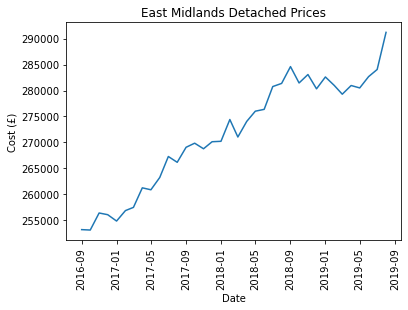

In [111]:
plt.plot(gby.Date[gby.Area == 'East Midlands'], gby.Detached[gby.Area == 'East Midlands'])
plt.xticks(rotation=90)
plt.ylabel('Cost (£)')
plt.xlabel('Date')
plt.title('East Midlands Detached Prices')
plt.show()

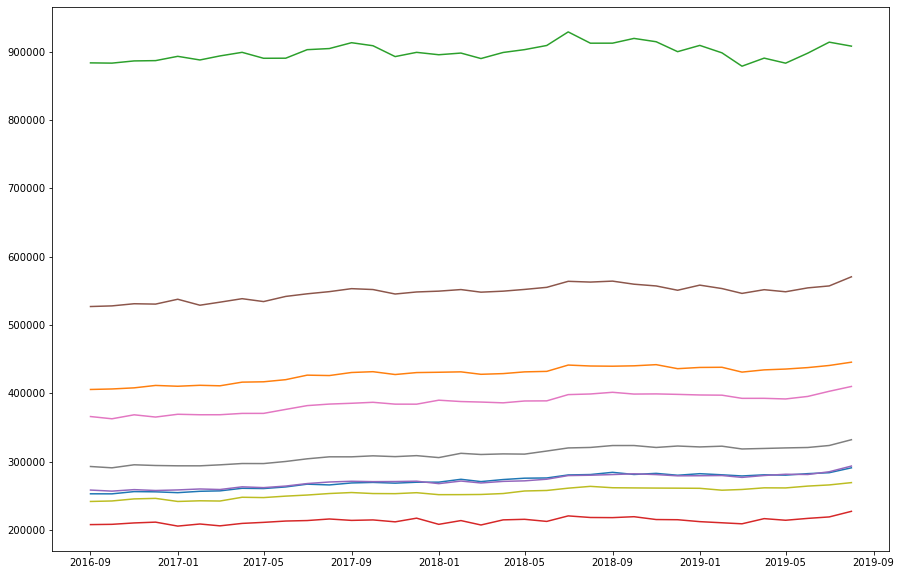

In [112]:
fig = plt.figure(figsize=(15,10))
for i in gby.Area.unique():
    plt.plot(gby.Date[gby.Area == i], gby.Detached[gby.Area == i])

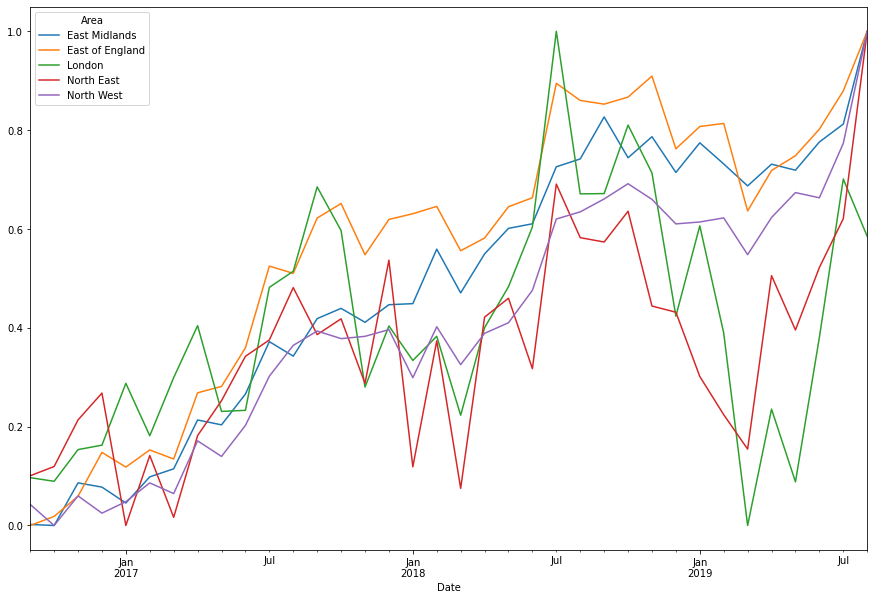

In [124]:
gby_pivot.loc[:,gby_pivot.columns[:5]].plot(figsize=(15,10))
plt.show()

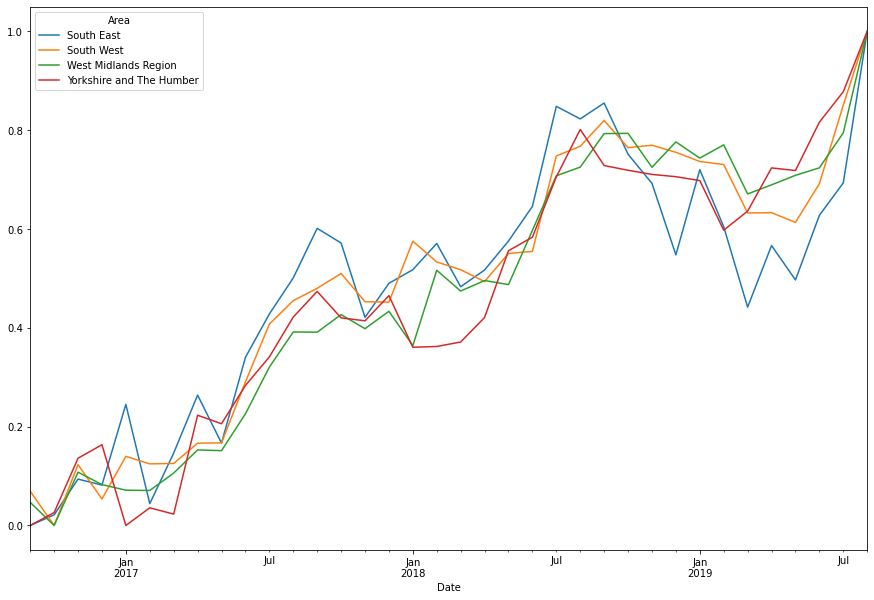

In [125]:
gby_pivot.loc[:,gby_pivot.columns[5:]].plot(figsize=(15,10))
plt.show()